In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import math
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1. Approximating Images with NN
(a)
There are 9 layers in total. The first layer has 2 neurons, and is the input layer (x,y coordinates of the pixel), and the last layer has 3 neurons, and is the output layer (r,g,b values of the pixel). The 7 layers in the middle are fully-connected, and each has 20 neurons. They push all ouputs from the previous layer through some function, and output the value to the next layer. The set of all fully-connected layers aim to map the input coordinates to their corresponding output r,g,b values.

(b)
The loss shown is a weighted sum of the loss of the current iteration and the previous iterations. The loss for each iteration is L2 distance between output rgb and true rgb, and the loss displayed is the smooth_loss = 0.99*smooth_loss + 0.01*loss.

Text(0.5,0,'/100 iterations')

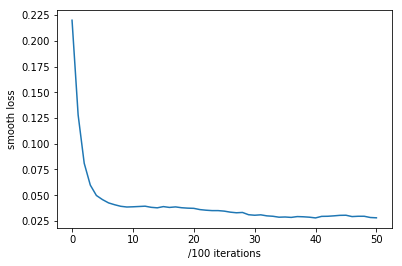

In [16]:
#(c) These answers are based on using the color pencil image
loss = np.array(np.loadtxt('hw4_loss.txt'))
plt.plot(loss.astype(np.float))
plt.ylabel('smooth loss')
plt.xlabel('/100 iterations')

The smooth loss converges around 0.030.

(d) 
By halving learning rate every 1000 iteration, smooth loss converged to 0.012 after running for 8000 iterations.

(e)
Using 4 layers, we were able to achieve acceptable results (20 hidden units in each layer).
Using 7 layers, we were able to achieve acceptable results with 13 hidden units in each layer.

(f)
By adding 3 layers to the network, we saw a small improvement in accuracy, but not much. The time taken to complete each iteration increased.

### 2. Random Forest

In [76]:
#(b) Input processing (900x604 image)
img = imread('fig.jpg')
print(np.shape(img))
x_list = np.random.uniform(0,604,5000)
y_list = np.random.uniform(0,900,5000)
xTr = zip(y_list,x_list)


(900, 604, 3)


(b)No preprocessing was done to the input data, because our data is discrete and scaling it does not affect the output of any decision trees in the random forest.

In [77]:
#(c) Output preprocessing
# Choose to regress all three values at once. Only need to scale r,b,g values to be between 0 and 1.
scaled_img = np.array(img,dtype=float)
for y in range(900):
    for x in range(604):
        scaled_img[y,x] = img[y,x]/255.0
        
yTr = []
for i in range(5000):
    yTr.append(scaled_img[np.int(y_list[i]),np.int(x_list[i])])
    

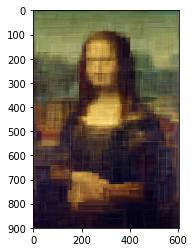

In [80]:
#(d)
#This function uses scikit-learn random forest implementation:
#Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

def randforest(num_tree=10, depth=None):
    randforest = RandomForestRegressor(n_estimators=num_tree, max_depth=depth,random_state=3)
    randforest.fit(xTr, yTr)
    yTe = np.zeros([900,604,3])
    for i in range(900):
        for j in range(604):
            yTe[i,j] = randforest.predict(np.array([i,j]).reshape(1,-1))
    plt.imshow(yTe)
    plt.show()
    return yTe

ten_tree_yTe = randforest(10)


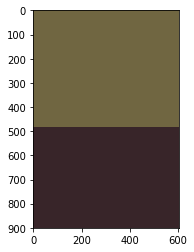

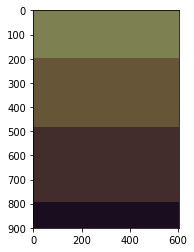

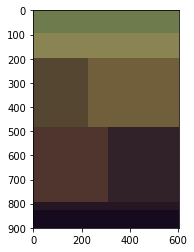

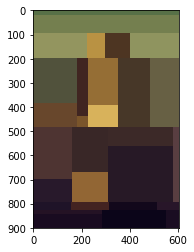

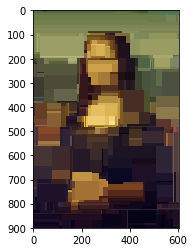

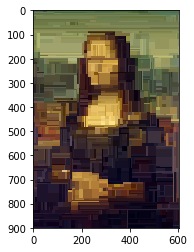

In [81]:
#(e)
#(i)Experimentation with one tree
one_d1_yTe = randforest(1,1)
one_d2_yTe = randforest(1,2)
one_d3_yTe = randforest(1,3)
one_d5_yTe = randforest(1,5)
one_d10_yTe = randforest(1,10)
one_d15_yTe = randforest(1,15)




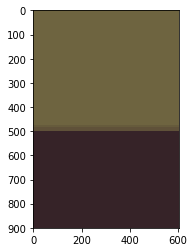

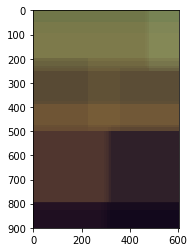

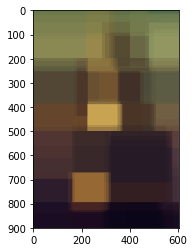

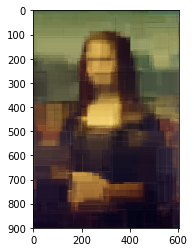

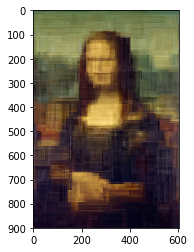

In [82]:
#(ii)Experimentation with seven trees
seven_d1_yTe = randforest(7,1)
seven_d3_yTe = randforest(7,3)
seven_d5_yTe = randforest(7,5)
seven_d10_yTe = randforest(7,10)
seven_d100_yTe = randforest(7,100)




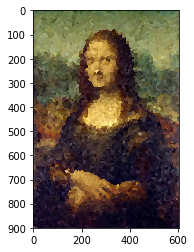

In [89]:
#(iii)kNN
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(xTr, yTr)
yTe = np.zeros([900,604,3])
for i in range(900):
    for j in range(604):
        yTe[i,j] = neigh.predict(np.array([i,j]).reshape(1,-1))
plt.imshow(yTe)
plt.show()

(iv)






In [105]:
#(f)
randforest = RandomForestRegressor(n_estimators=2, max_depth=10,random_state=3)
randforest.fit(xTr, yTr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [107]:
dot_data = tree.export_graphviz(randforest.estimators_[1], out_file=None)  
graph = graphviz.Source(dot_data)

(i)The decision rule at one of the roots is y <= 499.331, where y is the y-coordinate of our input pixel.
(ii)
Random Forest:
The output image consists of patches of colors. The patches are rectangular because our decision rules split according to the x-coordinate or the y-coordinate. The colors shown are those that were sampled in the training data.
kNN:
Each pixel is assigned the color of its closest neighbor in the training sample. Since the distance is L2, the decision boundaries are not straight lines but more wriggly.
(iii)
Let d be the depth of the tree, there can be at most 2^d color patches.
(iv)
Let n be the number of trees in the forest, then there can be at most n*(2^d) choose n number of patches.